<h1>Geometría Diferencial Discreta</h1>
<h2>Proyecto final</h2>
<h4>Miguel Ruíz & Franklin Echeverría</h4>

Se encontrará una solución numérica al siguiente sistema.
Sea 
$$
\Omega=\{(x,y):x^{2}+y^{2}\leq1\}
$$

Encontrar $f:\Omega\rightarrow\mathbb{R}$ tal que 
\begin{align*}
\Delta f & =-1\\
f(x,y) & =10 \quad \text{ para } (x,y)\in\partial\Omega
\end{align*}

Además comparar gráficamente con la solución exacta
$$
f(x,y)=\frac{1-x^{2}-y^{2}}{4}+10
$$

Para ello se importará una malla que sirva como discretización de $\Omega$. Sobre esta se calculará la discretización del laplaciano y utilizando mínimos cuadrados se resolverá finalmente el sistema.


---



# Librerías e importación de datos

In [1]:
# Librerias
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import numpy as np
import networkx as nx # Libreria de graficas
import math


### Cargar la primera malla (la más burda)

In [ ]:
a = np.loadtxt("aristas_malla1.txt",delimiter=",",dtype=int) - 1
c = np.loadtxt("caras_malla1.txt",delimiter=",",dtype=int) - 1
# Leyendo geometria de la malla
v = np.loadtxt("coordenadas_malla1.txt",delimiter=",")

### Cargar la segunda malla

In [44]:
a = np.loadtxt("aristas_malla2.txt",delimiter=",",dtype=int) - 1
c = np.loadtxt("caras_malla2.txt",delimiter=",",dtype=int) - 1
# Leyendo geometria de la malla
v = np.loadtxt("coordenadas_malla2.txt",delimiter=",")

### Cargar la tercera malla (la más fina)

In [159]:
a = np.loadtxt("aristas_malla3.txt",delimiter=",",dtype=int) - 1
c = np.loadtxt("caras_malla3.txt",delimiter=",",dtype=int) - 1
# Leyendo geometria de la malla
v = np.loadtxt("coordenadas_malla3.txt",delimiter=",")

# Discretización del Laplaciano

<h3>Matriz de primera derivada exterior ($d_0$)</h3>


In [160]:
# Se crea una matriz de ceros
d_0= np.zeros([len(a), len(v)]) 

# Se asignan las orientaciones de las aristas
for i in range(len(a)):
  d_0[i][ a[i][0] ] = -1
  d_0[i][ a[i][1] ] = 1

In [161]:
d_0

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0., -1.,  0.]])

<h3>Matriz de la estrella de Hodge para 1 formas ($*_1$)</h3>

In [162]:
# Funcion que calcula el circuentro de un triangulo
def circuncentro ( t ): # t es una lista con los numeros de los vertices que forman el triangulo
  # Coordenadas de los puntos
  A=v[t[0]]
  B=v[t[1]]
  C=v[t[2]]
  # Calculo del circuncentro
  D=2*( A[0]*(B[1]-C[1])+B[0]*(C[1]-A[1])+C[0]*(A[1]-B[1]) )
  O_x=( (A[0]*A[0]+A[1]*A[1])*(B[1]-C[1]) + (B[0]*B[0]+B[1]*B[1])*(C[1]-A[1]) + (C[0]*C[0]+C[1]*C[1])*(A[1]-B[1]) )/D
  O_y=( (A[0]*A[0]+A[1]*A[1])*(C[0]-B[0]) + (B[0]*B[0]+B[1]*B[1])*(A[0]-C[0]) + (C[0]*C[0]+C[1]*C[1])*(B[0]-A[0]) )/D
  # Circuncentro
  return np.array([O_x,O_y])

# Matriz de circuncentros para cada triángulo en la matriz c
circuncentros=[]
for i in c:
  circuncentros.append( circuncentro(i) )

In [163]:
# Funcion distancia en R2
def distancia( a , b):
  return math.sqrt( (a[0]-b[0])*(a[0]-b[0]) + (a[1]-b[1])*(a[1]-b[1]) )

# Funcion que devuelve los indices de los puntos (en circuncentros[]) que forman la arista dual dada la original
def arista_dual( a_orig ):
  a_set = set(a_orig)
  r = []
  global c
  for i in range(len(c)):
    cara = set(c[i])
    if ( len( a_set & cara )==2 ):
      r.append(i)
  return r

# Funcion que devuelve la longitud de arista dual dada la arista original a_orig
def long_dual( a_orig ):
  # Se obtienen los puntos que definen la arista dual
  p=arista_dual(a_orig)
  if ( len(p) == 0 ):
    print("Error")
  elif ( len(p) == 1 ):
    a=v[a_orig[0]]
    b=v[a_orig[1]]
    medio=[ (a[0]+b[0])/2. , (a[1]+b[1])/2. ]
    return distancia( circuncentros[p[0]] , medio )
  else:
    return distancia( circuncentros[p[0]], circuncentros[p[1]] )

In [164]:
# Se crea una matriz de ceros
estrella1= np.zeros([len(a), len(a)]) ### CHECAR SI SE DEBE QUEDAR COMO MATRIZ DE ENTEROS  d_0= np.zeros([len(a), len(v)], dtype = int)

# Se asignan las orientaciones de las aristas
for i in range(len(a)):
  p=v[a[i][0]] 
  q=v[a[i][1]]
  estrella1[i][i] =(long_dual(a[i]))/(distancia(p, q))


In [165]:
estrella1

array([[0.71761043, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.22053389, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.8096308 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.54850195, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.90656589,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.39662521]])

<h3>Matriz de derivada exterior para 1 formas ($d_1$)</h3>

$$d_1^d = -d_0^T$$

In [167]:
d_1= -np.transpose(d_0)

In [168]:
d_1

array([[-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       ...,
       [-0., -0., -0., ...,  1., -0., -0.],
       [-0., -0., -0., ..., -0., -0.,  1.],
       [-0., -0., -0., ..., -0., -1., -0.]])

<h3>Estrella de Hodge para 2 formas ($*_2$)</h3>

In [169]:
# Arreglo vs numeración de los vertices
vs = np.array([i for i in range(len(v))])

# Arreglo vc tal que vc[i] son las caras a las que pertenece el vertice i
vc = [[] for i in vs]
for i in range(len(c)):
    vc[c[i][0]].append(c[i])
    vc[c[i][1]].append(c[i])
    vc[c[i][2]].append(c[i])

Cálculo del área de la celda dual

In [170]:
def semiAreaDual(i, ci):
    # Funcion para calcular la aportacion del triangulo ci al area de [v_i]*
    # i es el indice del vertice (dual)
    l = []
    if ci[0] != i:
        l.append(distancia(v[i], v[ci[0]]))
    if ci[1] != i:
        l.append(distancia(v[i], v[ci[1]]))
    if ci[2] != i:    
        l.append(distancia(v[i], v[ci[2]]))
    l = np.array(l)
    l = l/2.0
    
    cci = circuncentro(ci) 
    
    z = distancia(cci, v[i])
    
    area = (l[0]/2.0)*(z**2 - l[0]**2)**0.5+(l[1]/2.0)*(z**2 - l[1]**2)**0.5 # esta formula se deduce sacando el area de los triangulos
    # (v[i], cci, p1), (v[i], cci, p2), donde p1 y p2 son los puntos medios de los segmentos del triangulo ci que contienen a v[i]
    # y utilizando teorema de pitagoras para calcular distancia(p1, cci) y distancia(p2, cci)
    
    return area

In [171]:
def areaDual(i):
    area = 0.0
    for j in range(len(vc[i])):
        area += semiAreaDual(i, vc[i][j])
    
    return area

In [172]:
n = len(vs)
estrella2 = np.zeros((n,n))
for i in range(n):
    estrella2[i][i] = areaDual(i)**(-1)

In [173]:
estrella2

array([[301.1201327 ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , 290.45804203,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        , 307.91096032, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 225.76557137,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
        165.35881147,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 223.72535478]])

<h3>Matriz del Laplaciano ($\Delta_0$)</h3>

In [174]:
L=np.matmul(estrella2, np.matmul(d_1, np.matmul(estrella1, d_0)))

In [175]:
L

array([[-584.62162674,   78.07933921,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [  75.31469845, -502.84308748,  117.27618724, ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,  124.32302849, -545.16601681, ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ..., -958.39608235,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
        -602.1708461 ,  150.44001852],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
         203.54068959, -872.90150947]])

# Solución

Podemos agregar las condiciones de frontera $$f(x,y)=10, \quad \forall \quad (x,y)\in \partial \Omega,$$ a nuestro sistema de ecuaciones como sigue. Sea $n$ el número de vértices de la malla asociada a $\Omega$ y $k$ el número de vértices en la frontera. Sea $A$ la matriz de $(n+k)\times n$ tal que las primeras $n\times n$ entradas corresponden a la matriz $[\Delta]$ asociada a la discretización del Laplaciano y la entrada $A_{(n+i)\times j} = 1$ si el vértice $j$ es el $i$-ésimo vértice en la frontera, y $0$ en las demás entradas. Sea $q\in \mathbb{R}^{n+k}$ (como vector columna) tal que las primeras $n$ entradas son iguales a $-1$ y las últimas $k$ entradas son iguales a $10$. De esta manera, al solucionar la ecuación
$$ Af = q, \quad f\in \mathbb{R}^n,$$ obtendremos un vector $f$ que representa la función $f_0$ evaluada en los vértices de la malla tal que $\Delta f_0 = -1$ y que cumple las condiciones de frontera.

Para solucionar el sistema $Af=q$, dado que $A$ tiene más renglones que columnas, en principio puede que no haya solución (aunque sabemos que sí existe). Quisiéramos de todos modos encontrar $f$ que minimice $||Af-q||^2$, y en el mejor de los casos dicha norma será 0, que es cuando sí hay solución. Tenemos así un problema de mínimos cuadrados lineales el cual sabemos que se soluciona con el sistema $A^TAf = A^Tq$. 

In [177]:
def minimosCuadrados(A, q):
    At = np.transpose(A)
    AtA = At @ A
    Atq = At @ q
    
    f = np.linalg.solve(AtA, Atq)
    return f

In [178]:
def frontierCondition(L, q, frontier):
    # Recibe la discretizacion del Laplaciano L, el vector independiente q, y los indices de los vertices de la malla en la frontera de Omega (la bola de radio 1)
    # Agrega filas a la matriz para considerar las condiciones de frontera y las entradas correspondientes a q
    n = L.shape[0]
    k = len(frontier)
    Ladd = np.zeros([k,n])
    for i in range(k):
        Ladd[i][frontier[i]] = 1.0
    
    L = np.vstack((L, Ladd))
    
    q = np.hstack((q, [10 for i in range(len(frontier))]))
    
    return L, q
    

<h3>Solución del problema planteado</h3>

Grafo asociado a la malla





In [179]:
G = nx.Graph()
G.add_nodes_from(vs)
G.add_edges_from(a)


In [180]:
# Funcion para encontrar los puntos que son frontera
def frontera():
  global G
  f=[]
  for i in G.nodes:
    if (G.degree(i)<=4):
      f.append(i)
  return f

# Vectores necesarios para resolver el problema 
q = np.array([-1 for i in range(len(v))])
frontier = frontera()

In [187]:
# Se aumenta la matriz laplaciana y el vector q
A, qa = frontierCondition(L, q, frontier)

# Se resuelve el sistema
f = minimosCuadrados(A , qa)
f

array([10.00398475, 10.00337982, 10.00290194, 10.0022141 , 10.00143124,
       10.00074658, 10.00004894,  9.99934661,  9.99883127,  9.99902011,
        9.9996986 , 10.00035677, 10.00011463,  9.99982438,  9.99927096,
        9.99856357,  9.99800895,  9.99771138,  9.99760574,  9.99752831,
        9.99764768,  9.99756022,  9.99736754,  9.99714759,  9.99670341,
        9.99591247,  9.99505189,  9.99481311,  9.99520669,  9.9957805 ,
        9.99570419,  9.99566392,  9.99540155,  9.99499187,  9.99470564,
        9.99463766,  9.99471977,  9.99485653,  9.99522456,  9.99550203,
        9.99591654,  9.99671253,  9.99793156,  9.99917432,  9.99999616,
       10.00031654, 10.00093108, 10.00166446, 10.00173317, 10.00184286,
       10.00179302, 10.00170883, 10.00187676, 10.00235422, 10.00299492,
       10.00383671, 10.00496342, 10.00585955, 10.00664692, 10.00734769,
       10.00777846, 10.00775496, 10.00754848, 10.0078192 , 10.00850154,
       10.00915108, 10.00884063, 10.00832847, 10.00741779, 10.00

# Resultados


<h3>Comparación entre solucion numérica y teórica</h3>

Se calculará el error de aproximación entre la solución teórica y la solución encontrada con la discretización.

In [182]:
# Funcion teorica que resuelve el sistema
def solucionTeorica(p):
  return (1-p[0]*p[0]-p[1]*p[1])/4 + 10

# Diferencia entre solucion numerica y teorica
def diferencia(f, v):
  error=0
  for i in range(len(f)):
    error+=abs(f[i]-solucionTeorica(v[i]))
  return error

error=diferencia(f,v)
print("Error de aproximacion: " + str(error) )

Error de aproximacion: 73.76677068821262


Solución teórica

In [190]:
sol_teo = np.array([solucionTeorica(p) for p in v])
sol_teo

array([10.        , 10.        , 10.        , 10.        , 10.        ,
       10.        , 10.        , 10.        , 10.        , 10.        ,
       10.        , 10.        , 10.        , 10.        , 10.        ,
       10.        , 10.        , 10.        , 10.        , 10.        ,
       10.        , 10.        , 10.        , 10.        , 10.        ,
       10.        , 10.        , 10.        , 10.        , 10.        ,
       10.        , 10.        , 10.        , 10.        , 10.        ,
       10.        , 10.        , 10.        , 10.        , 10.        ,
       10.        , 10.        , 10.        , 10.        , 10.        ,
       10.        , 10.        , 10.        , 10.        , 10.        ,
       10.        , 10.        , 10.        , 10.        , 10.        ,
       10.        , 10.        , 10.        , 10.        , 10.        ,
       10.        , 10.        , 10.        , 10.        , 10.        ,
       10.        , 10.        , 10.        , 10.        , 10.  

Multiplicación de la matriz Laplaciana multiplicada por el vector que representa a la solución teórica $\Delta f$.

In [191]:
L @ sol_teo

array([10.71182945, 11.68318315, 12.78913486, 12.74229989, 12.74224563,
       12.51247683, 12.24755882, 14.1853737 , 12.09932499, 12.18822154,
       11.90574664, 16.0047564 , 10.71371638, 15.15796104, 13.458452  ,
       12.29647719, 13.73960319, 10.27049158, 10.71183942, 11.68318455,
       12.78913294, 12.74229816, 12.7422439 , 12.51247503, 12.24755616,
       14.18537311, 12.09932572, 12.18822154, 11.90574664, 16.0047564 ,
       10.71371638, 15.15796104, 13.458452  , 12.29647719, 13.73960319,
       10.27049158, 10.71183942, 11.68318455, 12.78913294, 12.74229816,
       12.7422439 , 12.51247503, 13.00261671, 14.64965685, 12.64063061,
       12.18822154, 11.90574664, 16.0047564 , 10.71371638, 15.15796104,
       13.458452  , 12.29647719, 13.73960319, 10.27049158, 10.71183942,
       11.68318455, 12.78913294, 12.74229816, 12.7422439 , 12.51247503,
       12.24755616, 14.18537312, 12.09932573, 12.18822159, 11.90574671,
       16.00475649, 10.7137164 , 15.15796103, 13.45845136, 12.29

Multiplicación de la matriz del Laplaciano por la solución encontrada

In [192]:
L@f

array([-4.21263181e-01, -4.00037898e-01, -4.34063077e-01, -4.32156056e-01,
       -4.32178599e-01, -4.22553966e-01, -4.11048883e-01, -4.86261840e-01,
       -4.04560562e-01, -4.08775221e-01, -3.96229597e-01, -5.42361625e-01,
       -3.34706576e-01, -5.22088477e-01, -4.71422314e-01, -4.37198466e-01,
       -5.13884478e-01, -4.16812395e-01, -4.21538566e-01, -4.00314108e-01,
       -4.34314854e-01, -4.32399304e-01, -4.32412299e-01, -4.22781858e-01,
       -4.11271793e-01, -4.86448697e-01, -4.04768265e-01, -4.08970635e-01,
       -3.96410722e-01, -5.42496095e-01, -3.34883930e-01, -5.22214280e-01,
       -4.71553183e-01, -4.37326410e-01, -5.13984074e-01, -4.16918058e-01,
       -4.21629291e-01, -4.00388194e-01, -4.34363316e-01, -4.32424505e-01,
       -4.32411397e-01, -4.22751322e-01, -4.38309570e-01, -5.01600299e-01,
       -4.21156930e-01, -4.08818004e-01, -3.96242438e-01, -5.42345001e-01,
       -3.34647561e-01, -5.22016293e-01, -4.71311206e-01, -4.37047207e-01,
       -5.13725942e-01, -

<h3>Graficación</h3>

Primero, esta es una visualización de la discretización utilizada para aproximar la función.

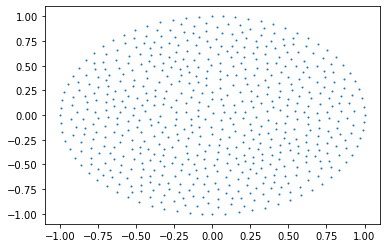

In [184]:
plt.scatter(v[:,0],v[:,1], s=1)

Ahora se muestra gráficamente la diferencia de la solución teórica con la solución aproximada obtenida.

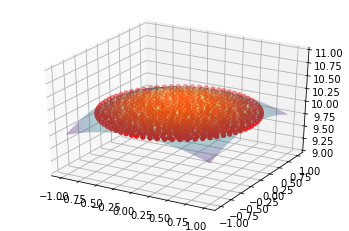

In [185]:
# Se crea la malla de graficación
X = np.arange(-1, 1, 0.01)
Y = np.arange(-1, 1, 0.01)
X, Y = np.meshgrid(X, Y)

# Se grafica la solución teórica
Z = (1-X**2-Y**2)/4+10
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.set_zlim(9,11)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis, alpha=0.4)

# Se grafican los puntos de la solución aproximada
ax.scatter(v[:,0] , v[:,1] , f,  color='red')

# Gráfica
plt.show()

La diferencia proyectando sobre el eje  $xz$. En rojo la solución teórica, en azul la aproximada

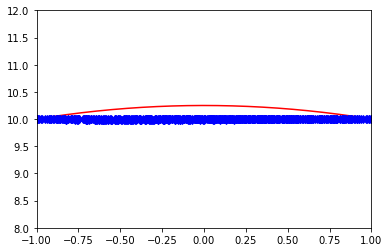

In [186]:
X=v[:,0]
x=np.arange(-1, 1, 0.01)
plt.axis([-1,1,8,12])
plt.plot(x, (1-x**2)/4+10, 'r', X, f, 'bd')